In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
mall = pd.read_csv('Mall_Customers.csv')

In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
x= mall.iloc[:,[3,4]]

ks = range(1,20)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k, random_state=42)
    #fit the model
    model.fit(x)
    #append the inertia
    inertias.append(model.inertia_)

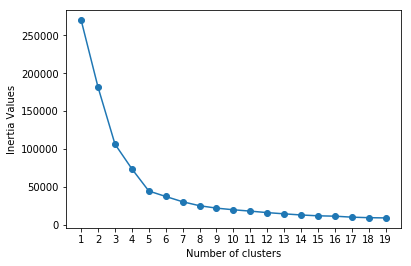

In [8]:
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.xticks(ks)
plt.show()

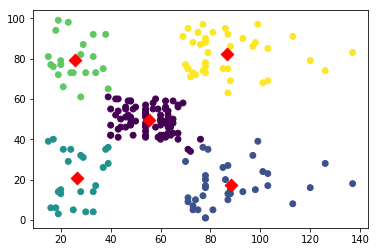

In [11]:
model = KMeans(n_clusters=5,random_state=42)

model.fit(x)

labels = model.predict(x)
centroids = model.cluster_centers_
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]
xs = mall.iloc[:,3]
ys = mall.iloc[:,4]

plt.scatter(xs,ys, c= labels, s = 35)
plt.scatter(centroid_x, centroid_y, marker = 'D', c='r', s=80)
plt.show()

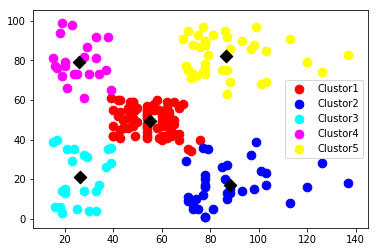

In [56]:
#to find out zero labelled values
x_arr= np.array(x)

plt.scatter(x_arr[labels==0,0],x_arr[labels==0,1],s= 75, c='red', label='Clustor1')
plt.scatter(x_arr[labels==1,0],x_arr[labels==1,1],s= 75, c='blue', label='Clustor2')
plt.scatter(x_arr[labels==2,0],x_arr[labels==2,1],s= 75, c='cyan', label='Clustor3')
plt.scatter(x_arr[labels==3,0],x_arr[labels==3,1],s= 75, c='magenta', label='Clustor4')
plt.scatter(x_arr[labels==4,0],x_arr[labels==4,1],s= 75, c='yellow', label='Clustor5')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = 'D', c='black', s=80)
plt.legend()
plt.show()

In [34]:
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [20]:
ks = range(1,11)
WCSS = []

for k in ks:
    #model the lmean
    model = KMeans(n_clusters=k)
    #fit the k mean
    model.fit(x) 
    WCSS.append(model.inertia_)

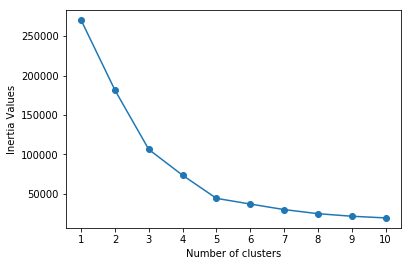

In [24]:
plt.plot(ks, WCSS,'-o')
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.show()

# Hirarchial Clustering

In [14]:
import scipy.cluster.hierarchy as sch

In [15]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
sch.linkage(x, method='ward') #ward minimizes the WCSS

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 74.        ,  85.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [107.        , 113

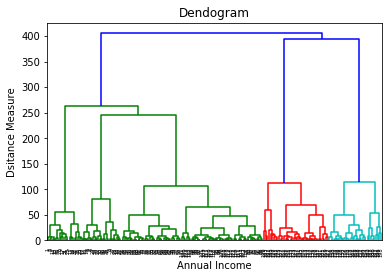

In [18]:
dendogram=sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Dsitance Measure')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
model_h = AgglomerativeClustering(n_clusters=5,linkage='ward')
model_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [21]:
labels=model_h.fit_predict(x)

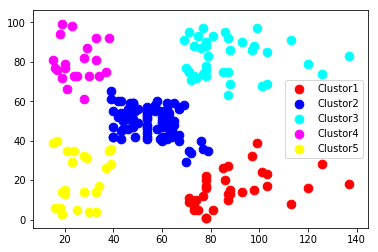

In [22]:
#to find out zero labelled values
x_arr= np.array(x)

plt.scatter(x_arr[labels==0,0],x_arr[labels==0,1],s= 75, c='red', label='Clustor1')
plt.scatter(x_arr[labels==1,0],x_arr[labels==1,1],s= 75, c='blue', label='Clustor2')
plt.scatter(x_arr[labels==2,0],x_arr[labels==2,1],s= 75, c='cyan', label='Clustor3')
plt.scatter(x_arr[labels==3,0],x_arr[labels==3,1],s= 75, c='magenta', label='Clustor4')
plt.scatter(x_arr[labels==4,0],x_arr[labels==4,1],s= 75, c='yellow', label='Clustor5')

#plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = 'D', c='black', s=80)
plt.legend()
plt.show()

# Wine Dataset

In [23]:
wine = pd.read_csv('wineQualityReds.csv',index_col=0)

In [24]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [26]:
wine.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

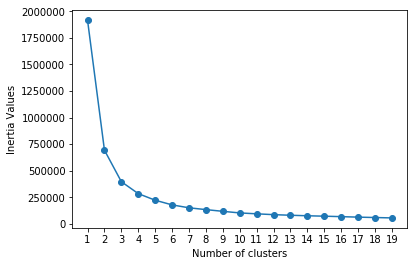

In [29]:
ks = range(1,20)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k, random_state=42)
    #fit the model
    model.fit(wine)
    #append the inertia
    inertias.append(model.inertia_)

plt.plot(ks, inertias,'-o')
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.show()

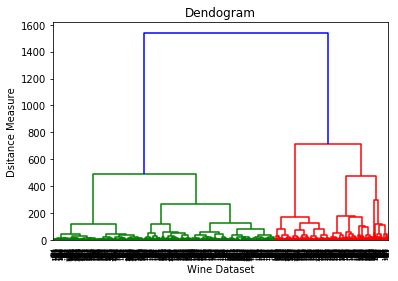

In [30]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(wine, method='ward'))
plt.title('Dendogram')
plt.xlabel('Wine Dataset')
plt.ylabel('Dsitance Measure')
plt.show()

In [32]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(wine)

labels = model.predict(wine)
centroids = model.cluster_centers_
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]
xs = wine.iloc[:,2]
ys = wine.iloc[:,10]

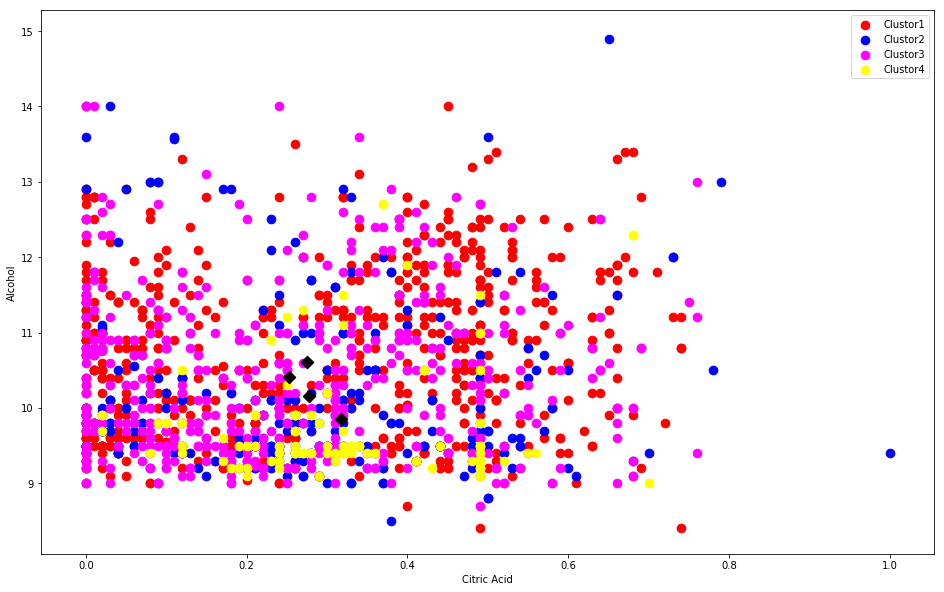

In [33]:
#to find out zero labelled values
wine = np.array(wine)

fig, axes = plt.subplots(figsize=(16, 10))

plt.scatter(wine[labels==0,2],wine[labels==0,10],s= 75, c='red', label='Clustor1')
plt.scatter(wine[labels==1,2],wine[labels==1,10],s= 75, c='blue', label='Clustor2')
plt.scatter(wine[labels==2,2],wine[labels==2,10],s= 75, c='magenta', label='Clustor3')
plt.scatter(wine[labels==3,2],wine[labels==3,10],s= 75, c='yellow', label='Clustor4')

plt.xlabel('Citric Acid')
plt.ylabel('Alcohol')


plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,10],marker = 'D', c='black', s=80)
plt.legend()
plt.show()

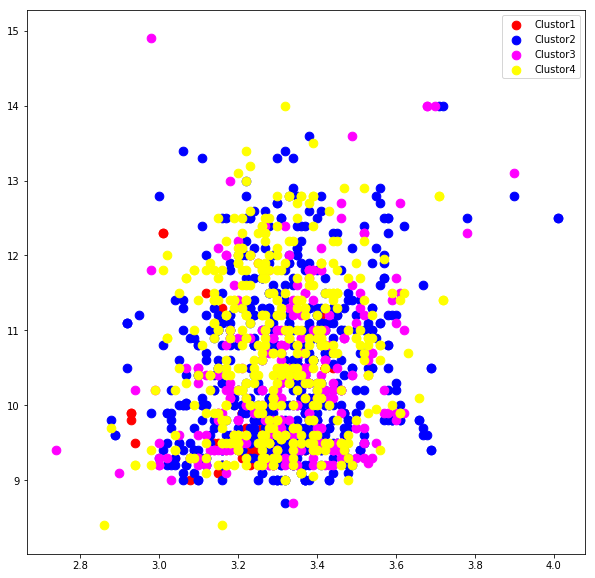

In [34]:
model_h = AgglomerativeClustering(n_clusters=5,linkage='ward')
labels=model_h.fit_predict(wine)

plt.figure(figsize=(10,10))

winearr= np.array(wine)

plt.scatter(winearr[labels==0,8],winearr[labels==0,10],s= 75, c='red', label='Clustor1')
plt.scatter(winearr[labels==1,8],winearr[labels==1,10],s= 75, c='blue', label='Clustor2')
plt.scatter(winearr[labels==2,8],winearr[labels==2,10],s= 75, c='magenta', label='Clustor3')
plt.scatter(winearr[labels==3,8],winearr[labels==3,10],s= 75, c='yellow', label='Clustor4')


#plt.scatter(model.cluster_centers_[:,8],model.cluster_centers_[:,10],marker = 'D', c='black', s=80)
plt.legend()
plt.show()

# Diabaties

In [35]:
diab = pd.read_csv('diabetes.csv', index_col= 0)

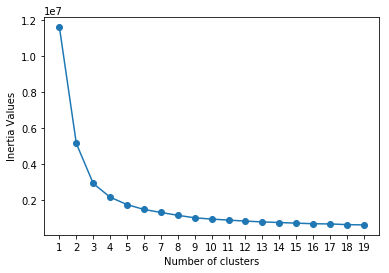

In [36]:
ks = range(1,20)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k, random_state=42)
    #fit the model
    model.fit(diab)
    #append the inertia
    inertias.append(model.inertia_)

plt.plot(ks, inertias,'-o')
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.show()

In [105]:
diab.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [106]:
diab.reset_index(inplace=True)

In [107]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


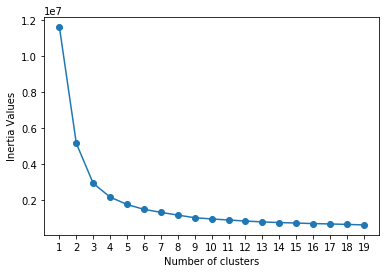

In [112]:
ks = range(1,20)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k, random_state=42)
    #fit the model
    model.fit(diab)
    #append the inertia
    inertias.append(model.inertia_)

plt.plot(ks, inertias,'-o')
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.show()

In [117]:
inertias[1] - inertias[3]

2991802.0542071676

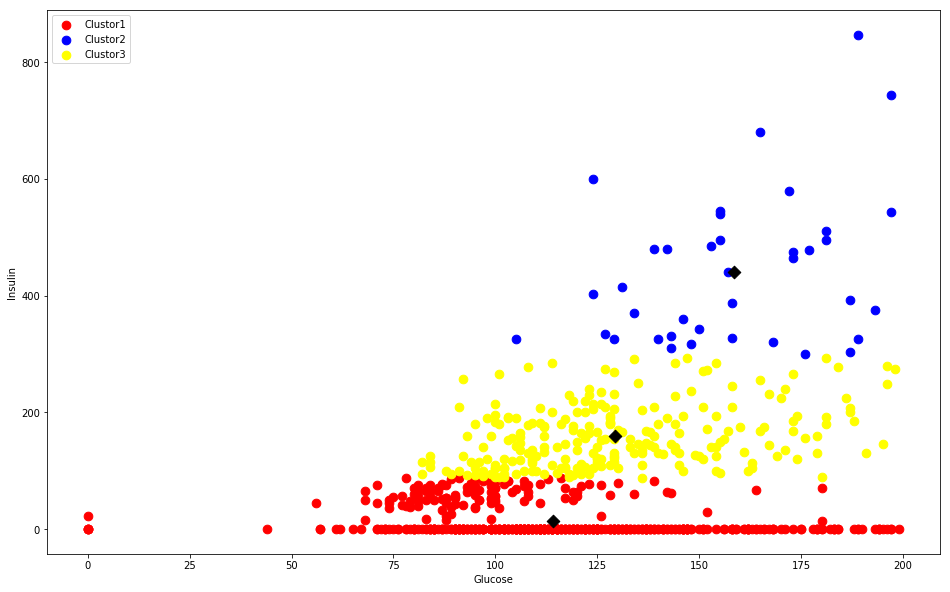

In [119]:
model = KMeans(n_clusters=3,random_state=42)
model.fit(diab)

labels = model.predict(diab)
centroids = model.cluster_centers_
centroid_x = centroids[:,1]
centroid_y = centroids[:,4]
xs = diab.iloc[:,1]
ys = diab.iloc[:,4]

fig, axes = plt.subplots(figsize=(16, 10))

diab_arr = np.array(diab)

plt.scatter(diab_arr[labels==0,1],diab_arr[labels==0,4],s= 75, c='red', label='Clustor1')
plt.scatter(diab_arr[labels==1,1],diab_arr[labels==1,4],s= 75, c='blue', label='Clustor2')
plt.scatter(diab_arr[labels==2,1],diab_arr[labels==2,4],s= 75, c='yellow', label='Clustor3')


plt.xlabel('Glucose')
plt.ylabel('Insulin')


plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,4],marker = 'D', c='black', s=80)
plt.legend()
plt.show()

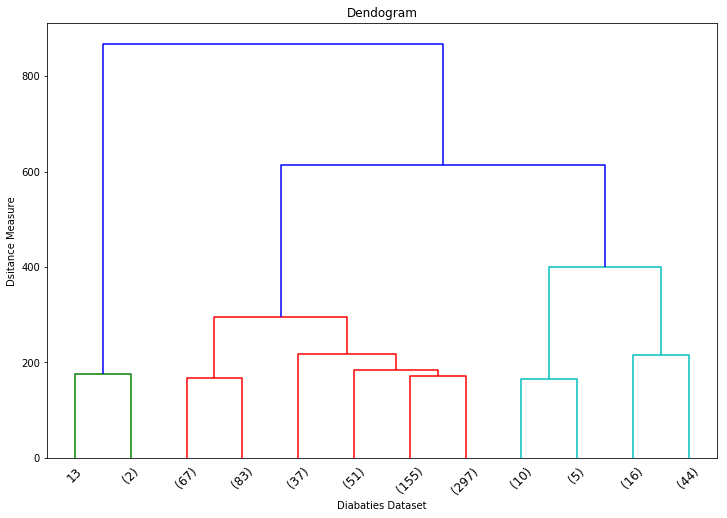

In [125]:
import scipy.cluster.hierarchy as sch

fig, axes = plt.subplots(figsize=(12, 8))

dendogram=sch.dendrogram(sch.linkage(diab, method='complete'),orientation= 'top', truncate_mode='lastp', p=12, leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('Diabaties Dataset')
plt.ylabel('Dsitance Measure')
plt.show()

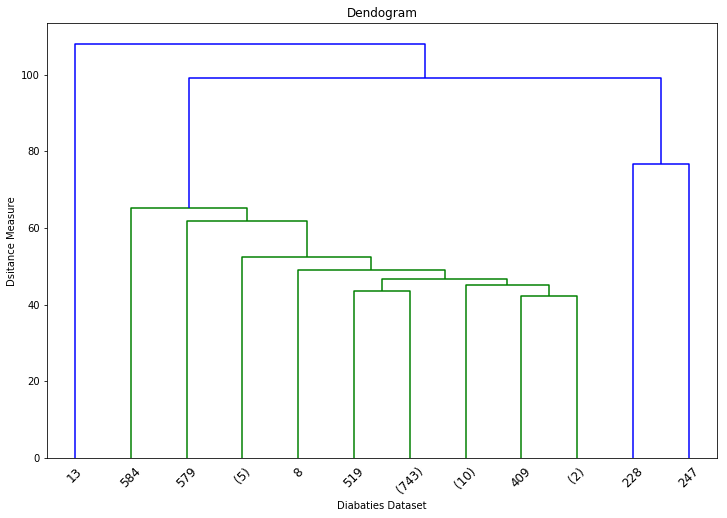

In [126]:

fig, axes = plt.subplots(figsize=(12, 8))

dendogram=sch.dendrogram(sch.linkage(diab, method='single'),orientation= 'top', truncate_mode='lastp', p=12, leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('Diabaties Dataset')
plt.ylabel('Dsitance Measure')
plt.show()